In [1]:
import os

In [2]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense, AveragePooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [3]:
train_data = pd.read_csv('/content/drive/My Drive/OCR/train.csv')
train_data.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = np.array(train_data)
random.shuffle(train_data)
train_data = pd.DataFrame(train_data)

In [5]:
X_train = train_data.drop(0, axis=1)
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = train_data[0]
len(y_train.unique())

26

In [7]:
modified_data = []
for image_array in X_train.iloc:
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)

modified_array = np.array(modified_data)

In [8]:
np.save('modified_train', modified_array)

In [9]:
X_train: np.ndarray = np.load('./modified_train.npy')
X_train.shape

(88799, 28, 28)

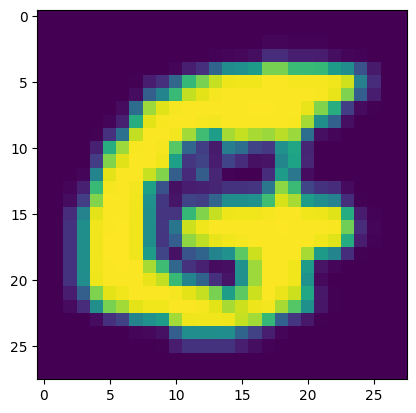

In [10]:
plt.imshow(X_train[0])

In [11]:
array = np.array([X_train[0]])
print(array)

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     4   4   2   2   2   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   4   5   9
    32  32  21  21  20   9   4   2   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   3  21  34  82 125 129 140
   203 203 174 172 170 140 125  63  18   0   0]
  [  0   0   0   0   0   0   0   1  20  34  84 170 204 233 249 250 250
   254 254 252 252 252 250 237 111  32   0   0]
  [  0   0   0   0   0   0   0   8  77 115 172 232 245 252 254 254 254
   254 254 254 254 253 247 206  76  20   0   0]
  [  0   0   0   0   0   0   7  90 218 243 252 254 254 254 254 254 255
   255 254 254 247 207 159  47   7   1   0   0]
  [  0   0   0   0   0   3  22 159 245 253 254 2

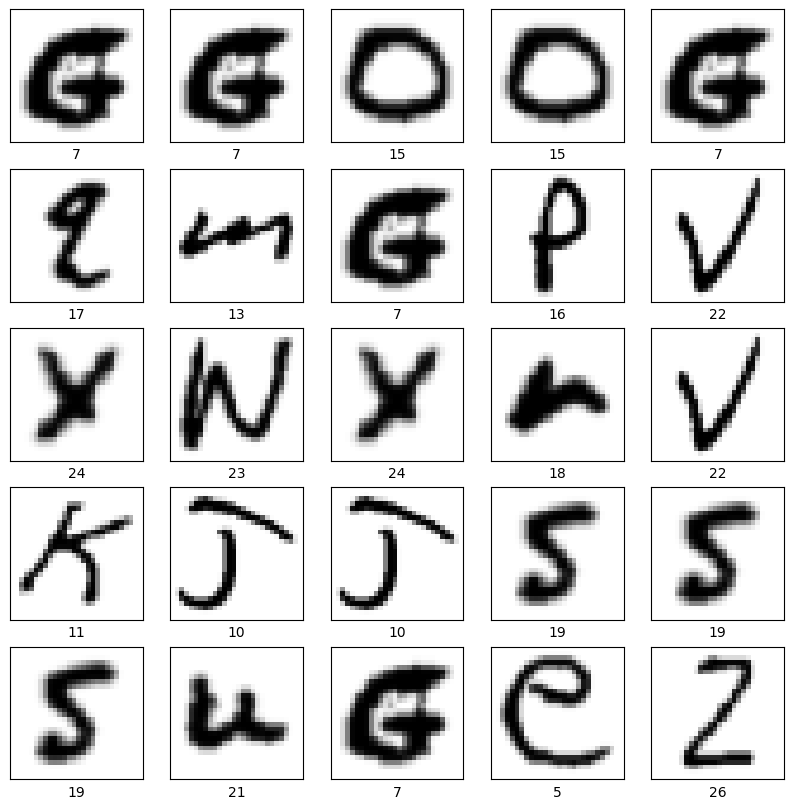

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [13]:
X_train[0].shape

(28, 28)

In [14]:
from tensorflow.keras import layers  
from tensorflow.keras import models

In [15]:
modelv1 = models.Sequential() 
modelv1.add(layers.Conv2D(6, (5,5), strides=1, activation='tanh', padding='same', input_shape=(28,28,1)))
modelv1.add(layers.AveragePooling2D((2,2), strides=2, padding='valid'))
modelv1.add(layers.Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid'))
modelv1.add(layers.AveragePooling2D((2,2), strides=2, padding='valid'))
modelv1.add(layers.Conv2D(120, (5,5), strides=1, activation='tanh',padding='valid'))

modelv1.add(layers.Flatten())
modelv1.add(layers.Dense(84, activation='tanh'))
modelv1.add(layers.Dense(28, activation='softmax'))

In [16]:
modelv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [17]:
modelv1.compile(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),                                                                                                                                                                                 
        metrics=['accuracy']                                                                                                                  
)

In [18]:
history = modelv1.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
2220/2220 [==============================] - 25s 6ms/step - loss: 0.5349 - accuracy: 0.8411 - val_loss: 0.3208 - val_accuracy: 0.8955
Epoch 2/10
2220/2220 [==============================] - 13s 6ms/step - loss: 0.2427 - accuracy: 0.9197 - val_loss: 0.2613 - val_accuracy: 0.9146
Epoch 3/10
2220/2220 [==============================] - 13s 6ms/step - loss: 0.1830 - accuracy: 0.9375 - val_loss: 0.2312 - val_accuracy: 0.9218
Epoch 4/10
2220/2220 [==============================] - 13s 6ms/step - loss: 0.1479 - accuracy: 0.9479 - val_loss: 0.2189 - val_accuracy: 0.9297
Epoch 5/10
2220/2220 [==============================] - 14s 6ms/step - loss: 0.1272 - accuracy: 0.9545 - val_loss: 0.2243 - val_accuracy: 0.9291
Epoch 6/10
2220/2220 [==============================] - 13s 6ms/step - loss: 0.1107 - accuracy: 0.9601 - val_loss: 0.2269 - val_accuracy: 0.9313
Epoch 7/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.0970 - accuracy: 0.9644 - val_loss: 0.2126 - val_ac

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.534948,0.841130,0.320784,0.895495,0
1,0.242717,0.919678,0.261342,0.914640,1
2,0.182953,0.937471,0.231160,0.921791,2
3,0.147861,0.947916,0.218871,0.929730,3
4,0.127193,0.954490,0.224255,0.929110,4
5,0.110718,0.960092,0.226947,0.931306,5
6,0.096995,0.964386,0.212590,0.934628,6
7,0.086596,0.968341,0.211232,0.937106,7
8,0.079738,0.970242,0.217573,0.934966,8
9,0.072728,0.972269,0.205276,0.940709,9


In [20]:
def plotTraining(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training_acc')
    plt.plot(epochs, val_acc, 'b', label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.legend() 

    plt.figure() 

    plt.plot(epochs, loss, 'bo', label='Training_loss')
    plt.plot(epochs, val_loss, 'b', label='Validation_loss')
    plt.title('Training and validation loss')
    plt.legend() 

    plt.show()

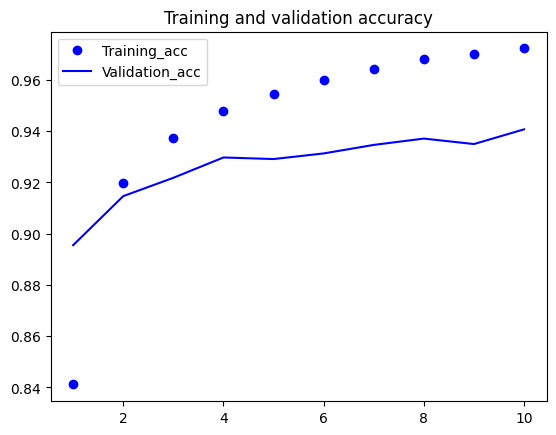

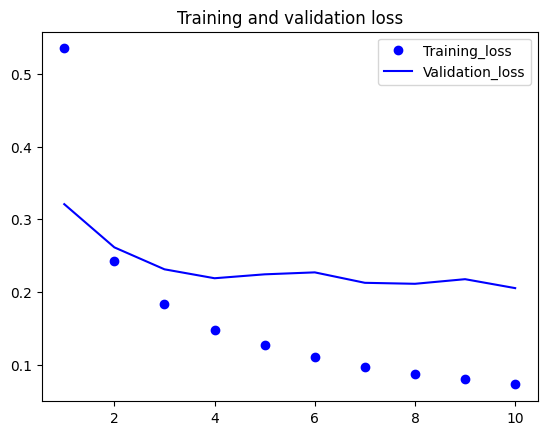

In [21]:
plotTraining(history)

In [22]:
modelv2 = models.Sequential() 
modelv2.add(layers.Conv2D(6, (5,5), strides=1, activation='tanh', padding='same', input_shape=(28,28,1)))
modelv2.add(layers.MaxPooling2D((2,2), strides=2, padding='valid'))
modelv2.add(layers.Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid'))
modelv2.add(layers.MaxPooling2D((2,2), strides=2, padding='valid'))
modelv2.add(layers.Conv2D(120, (5,5), strides=1, activation='tanh',padding='valid'))

modelv2.add(layers.Flatten())
modelv2.add(layers.Dense(84, activation='tanh'))
modelv2.add(layers.Dense(28, activation='softmax'))

In [23]:
modelv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [24]:
modelv2.compile(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),                                                                                                                                                                                 
        metrics=['accuracy']                                                                                                                  
)

In [25]:
historyv2 = modelv2.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
2220/2220 [==============================] - 14s 5ms/step - loss: 0.5881 - accuracy: 0.8228 - val_loss: 0.3657 - val_accuracy: 0.8840
Epoch 2/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.2662 - accuracy: 0.9119 - val_loss: 0.3028 - val_accuracy: 0.9023
Epoch 3/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.2010 - accuracy: 0.9318 - val_loss: 0.2620 - val_accuracy: 0.9148
Epoch 4/10
2220/2220 [==============================] - 12s 6ms/step - loss: 0.1644 - accuracy: 0.9436 - val_loss: 0.2642 - val_accuracy: 0.9126
Epoch 5/10
2220/2220 [==============================] - 13s 6ms/step - loss: 0.1407 - accuracy: 0.9507 - val_loss: 0.2522 - val_accuracy: 0.9213
Epoch 6/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.1209 - accuracy: 0.9564 - val_loss: 0.2579 - val_accuracy: 0.9191
Epoch 7/10
2220/2220 [==============================] - 10s 5ms/step - loss: 0.1097 - accuracy: 0.9611 - val_loss: 0.2439 - val_ac

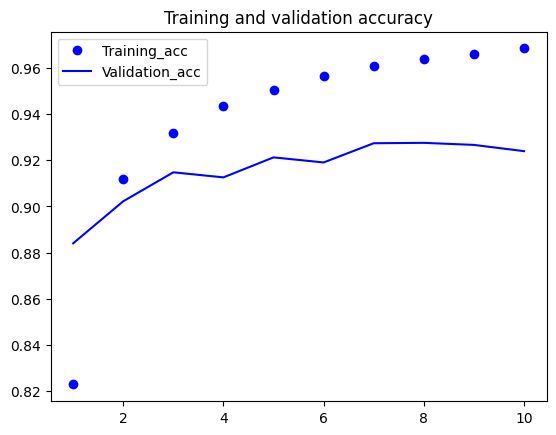

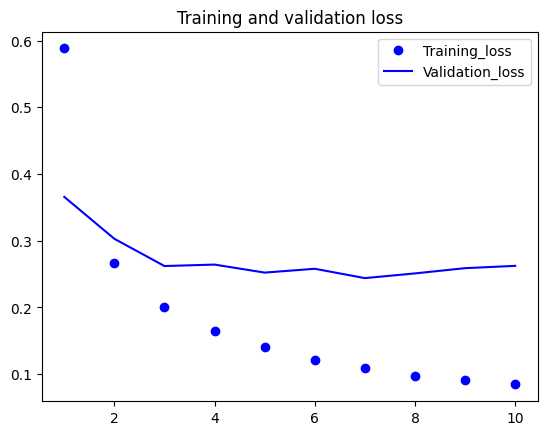

In [28]:
plotTraining(historyv2)